In [1]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
# for getting all figures inside the notebook

%matplotlib inline

In [2]:
X,y = make_blobs(n_samples=2000,centers=3,n_features = 3,cluster_std=1.0,random_state=0)

In [3]:
print(X.shape)
print(X)

(2000, 3)
[[ 0.37819659 -0.82265364  4.41250488]
 [ 0.11290836  8.0727675   9.91499801]
 [ 1.87598643 -2.86233678  1.95530677]
 ..., 
 [ 1.5826506  -0.52679473  2.35526587]
 [-1.03349156  8.51604336  9.54605506]
 [ 2.2699958  -2.52264855  1.75561551]]


In [4]:
print(y.shape)
print(y)

(2000,)
[1 2 1 ..., 1 2 1]


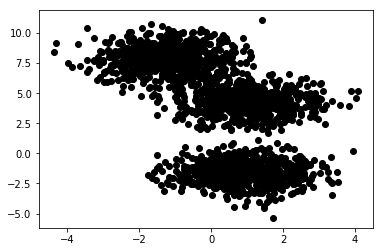

In [5]:
plt.scatter(X[:,0],X[:,1],c='black')

In [6]:
def computeDistance(x1,x2):
    '''Euclidean distance'''
    return np.sqrt(np.sum(np.power((x1-x2),2)))

In [7]:
def randomInit(X,no_of_clusters,no_of_samples,nof):
    centroids = []
    for i in range(no_of_clusters):
        temp = np.random.randint(0,no_of_samples)
        tempcents = []
        for j in range(nof):
            tempcents.append(X[temp,j])
        centroids.append(tempcents)
    centroids = np.matrix(centroids)
    return centroids

In [8]:
def labelling(x,centroids):
    distances = {}
    for i in range(len(centroids)):
        distances[computeDistance(x,centroids[i,:])] = i
    return distances[min(distances.keys())]

In [9]:
def clusterAssignment(X,clusters,centroids):
    for i in range(len(X)):
        clusters[i] = labelling(X[i,:],centroids)
    return clusters

In [10]:
def updateCentroid(X,clusters,centroids,nof):
    sums = np.matrix(np.zeros(centroids.shape))
    count = np.zeros(len(centroids),dtype=int)
    newCentroids = np.matrix(np.zeros(centroids.shape))
    for i in range(len(X)):
        for j in range(nof):
            sums[clusters[i],j]+=X[i,j]
        count[clusters[i]]+=1
    for i in range(len(centroids)):
        newCentroids[i,:] = sums[i,:]/count[i]

    return newCentroids

In [11]:
clusters = np.zeros(len(X),dtype=int)
print(clusters.shape)
print(clusters)

(2000,)
[0 0 0 ..., 0 0 0]


In [12]:
centroids = randomInit(X,3,len(X),3)


In [13]:
clusters = clusterAssignment(X,clusters,centroids)
print(clusters)

[2 0 2 ..., 2 0 2]


In [14]:
new_centroids = updateCentroid(X,clusters,centroids,3)

In [15]:
print(centroids)
print(new_centroids)
dif = np.abs(np.subtract(new_centroids,centroids))
print(dif)
decision = (dif<0.001).all()
print(decision)

[[ 0.80900917  7.49477032  9.29507316]
 [ 0.77883227  4.03255425  1.89680049]
 [ 0.7269988   3.144901    2.10686453]]
[[-1.20387321  7.81687692  9.3206707 ]
 [ 1.04678479  4.67970538  1.91374851]
 [ 0.91199564 -0.63748688  2.77114788]]
[[ 2.01288238  0.3221066   0.02559754]
 [ 0.26795251  0.64715112  0.01694802]
 [ 0.18499684  3.78238788  0.66428335]]
False


In [16]:
centroids = new_centroids

In [17]:
def kmeans_call(X,clusters,centroids,nof): 
    count = 0
    while True:
        count += 1
        print('old centroids')
        print(centroids)
        clusters = clusterAssignment(X,clusters,centroids)
        new_centroids = updateCentroid(X,clusters,centroids,nof)
        print('new centroids')
        print(new_centroids)
        dif = np.abs(np.subtract(new_centroids,centroids))
        print('dif')
        print(dif)
        decision = (dif<0.00001).all()
        print(decision)
        print('count of iterations' + str(count))
        if(decision):
            return centroids,clusters  
        centroids = new_centroids